<a href="https://colab.research.google.com/github/ruchithareddy296/2216139_AIML_BootCamp/blob/main/assignment7malaria(knn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#step1
dataset="/content/drive/MyDrive/outbreak_detect.csv"
import pandas as pd

df=pd.read_csv(dataset)

In [46]:
df.head(20)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes
6,31.0,24.0,88.77,41.40,10881,648,Yes
7,33.0,24.0,77.94,23.88,8830,459,Yes
8,31.0,24.0,84.57,11.15,9693,482,No
9,36.0,24.0,53.40,2.12,9310,549,No


In [47]:
df.isnull().sum()

maxTemp        2
minTemp        1
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       1
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [49]:
df.isnull()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


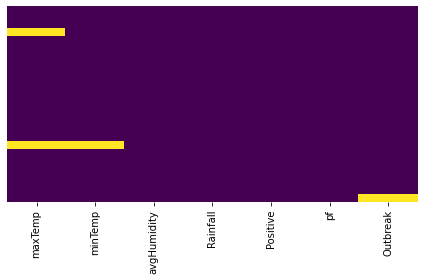

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [51]:
df.dropna(inplace=True)

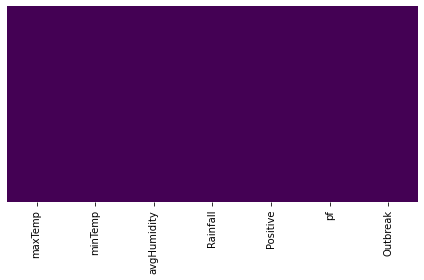

In [52]:
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [53]:
#data processing
from sklearn import preprocessing  
#labelencoding
LE=preprocessing.LabelEncoder()
#fitting it to our dataset
df.Outbreak=LE.fit_transform(df.Outbreak)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


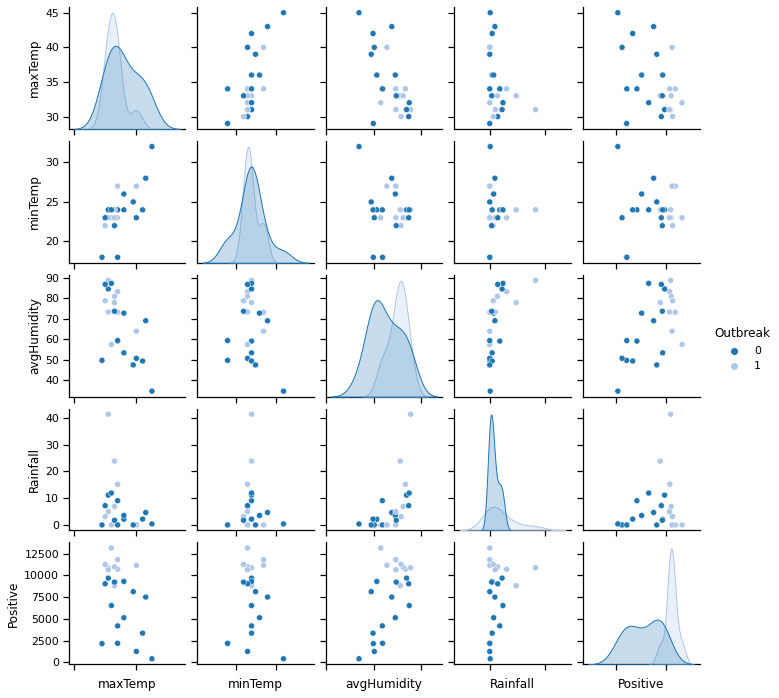

In [54]:
#Understanding the Distribution with Seaborn
import seaborn as sns
with sns.plotting_context("notebook",font_scale=1):
  g = sns.pairplot(df[['maxTemp','minTemp','avgHumidity','Rainfall','Positive','Outbreak']],hue='Outbreak',palette='tab20',size=2)
g.set(xticklabels=[])

In [55]:
from matplotlib.axis import YTick
#method 2 to load the data in the form of arrays -by library numpy
import numpy as np
X=np.array(df[['avgHumidity',	'Rainfall',	'Positive',	'pf']])
Y=np.array(df[['Outbreak']])

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [57]:
X

array([[-1.19719803e+00, -6.84436831e-01, -1.49995159e+00,
        -1.29354690e+00],
       [ 1.04281737e+00,  9.18412761e-01,  8.06223832e-01,
         1.21572940e+00],
       [-1.13039172e+00, -6.84436831e-01, -1.74212560e+00,
        -1.22692894e+00],
       [-5.67882637e-01,  2.69690456e-01, -9.49874470e-01,
        -8.53868394e-01],
       [ 3.72082072e-01, -6.84436831e-01,  1.10011910e+00,
         1.37117129e+00],
       [ 1.41025205e+00,  3.67548256e+00,  8.50402406e-01,
         1.08693469e+00],
       [ 6.86739768e-01,  1.83041522e+00,  2.97900854e-01,
         2.47548458e-01],
       [ 1.12966557e+00,  4.89792666e-01,  5.30377129e-01,
         3.49695989e-01],
       [-9.52686953e-01, -4.61175258e-01,  4.27203996e-01,
         6.47256186e-01],
       [-6.78781103e-01, -6.84436831e-01,  1.46270666e+00,
         1.93076211e+00],
       [-5.51849124e-01, -6.84436831e-01, -1.48890695e+00,
        -1.18695817e+00],
       [-1.21790798e+00, -4.53803414e-01, -1.17507744e+00,
      

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [61]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0])

In [63]:
print("Predicted value for training data:",model.score(x_train,y_train)*100)

Predicted value for training data: 94.44444444444444


In [64]:
print("Predicted value for training data:",model.score(x_train,y_train)*100)

Predicted value for training data: 94.44444444444444


In [65]:
accuracy=model.score(X,Y)*100
print(accuracy)

91.30434782608695
